# NYC Rolling Sales Data
Exploring and Analyzing Property Rolling Sales in New York City

- Link: https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page
- Glossary: https://www1.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf

### A. Importing and Cleaning Data
**1. Directories & Import**: Set directories, install package for importing excel, and import our data <br/>
**2. Extract Actual Data**: Remove titles rows, set the first row to be column names, and remove column name row from the data frame <br/>
**3. Variables & Data Types**: Import packages for data cleaning: dplyr, tidyr, and ggplot2. Rename variable names and convert variables to appropriate data types <br/>
**4. Transfer of Property**: Extract observations for transfer of property where sale price is zero <br/>
**5. Non-Transfer Properties**: Remove unreasonable observations to get the final clean_sales <br/>

### B. Quantitative Variables and Multilinear Regression
**1. Examine All Quantitative Variables**: Extract the quantitative variables to study if there are any relationship between them and the properties' sale prices <br/>
**2. Identify Outliers**: Look for any influential points using Cook's Distance and Leverage Points approach <br/>

### C. Qualitative Variables and Logistic Regression

#### A-1. Directories & Import

In [345]:
#Set Directories
setwd("D:/2018 Fall Baruch/CIS 3920 Data Mining")
getwd()

#Install packages
install.packages("readxl", repos = "http://cran.us.r-project.org")
install.packages("outliers", repos = "http://cran.us.r-project.org")
install.packages("cowplot", repos = "http://cran.us.r-project.org")
install.packages("tidyverse", repos = "http://cran.us.r-project.org")
install.packages("ggplot2", repos = "http://cran.us.r-project.org")
install.packages("plotly", repos = "http://cran.us.r-project.org")

[1] "D:/2018 Fall Baruch/CIS 3920 Data Mining"

function (expr) 
{
    enexpr(expr)
}
<bytecode: 0x0000000036346560>
<environment: namespace:rlang>

Installing package into 'C:/Users/khanhdi/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Installing package into 'C:/Users/khanhdi/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Installing package into 'C:/Users/khanhdi/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Installing package into 'C:/Users/khanhdi/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
also installing the dependencies 'glue', 'tidyselect', 'rlang', 'tidyr'



package 'glue' successfully unpacked and MD5 sums checked
package 'tidyselect' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked
package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\khanhdi\AppData\Local\Temp\Rtmp2zFNCi\downloaded_packages


Installing package into 'C:/Users/khanhdi/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
also installing the dependency 'rlang'



package 'rlang' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\khanhdi\AppData\Local\Temp\Rtmp2zFNCi\downloaded_packages


Installing package into 'C:/Users/khanhdi/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
also installing the dependencies 'rlang', 'ggplot2'



package 'rlang' successfully unpacked and MD5 sums checked
package 'plotly' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\khanhdi\AppData\Local\Temp\Rtmp2zFNCi\downloaded_packages


In [105]:
#Import package and data file
library(readxl)
rolling <- read_excel("rollingsales_manhattan.xls", col_names = FALSE)

In [106]:
sales <- rolling[-(1:4),]
colnames(sales) <- sales[1,]
sales <- sales[-1,]
head(sales, n = 5)

BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NA,A4,189 EAST 7TH STREET,NA,...,1,0,1,987,2183,1860,1,A4,4844809,43242
1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NA,A4,189 EAST 7TH STREET,NA,...,1,0,1,987,2183,1860,1,A4,0,43243
1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,390,35,NA,B1,113 AVENUE C,NA,...,2,0,2,1218,4764,1899,1,B1,0,43215
1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,2,NA,C7,21-23 AVENUE B,NA,...,12,4,16,4186,10588,1900,2,C7,10350000,43350
1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,389,18,NA,C1,200 EAST 7TH STREET,NA,...,18,0,18,2271,10650,1910,2,C1,5000000,43348


In [346]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(cowplot)
library(outliers)
library(plotly)

ERROR: Error: package 'ggplot2' 2.2.1 is loaded, but >= 3.0.0 is required by 'plotly'


In [108]:
str(sales)

Classes 'tbl_df', 'tbl' and 'data.frame':	16750 obs. of  21 variables:
 $ BOROUGH                       : chr  "1" "1" "1" "1" ...
 $ NEIGHBORHOOD                  : chr  "ALPHABET CITY" "ALPHABET CITY" "ALPHABET CITY" "ALPHABET CITY" ...
 $ BUILDING CLASS CATEGORY       : chr  "01 ONE FAMILY DWELLINGS" "01 ONE FAMILY DWELLINGS" "02 TWO FAMILY DWELLINGS" "07 RENTALS - WALKUP APARTMENTS" ...
 $ TAX CLASS AT PRESENT          : chr  "1" "1" "1" "2" ...
 $ BLOCK                         : chr  "390" "390" "390" "385" ...
 $ LOT                           : chr  "61" "61" "35" "2" ...
 $ EASE-MENT                     : chr  NA NA NA NA ...
 $ BUILDING CLASS AT PRESENT     : chr  "A4" "A4" "B1" "C7" ...
 $ ADDRESS                       : chr  "189 EAST 7TH STREET" "189 EAST 7TH STREET" "113 AVENUE C" "21-23 AVENUE B" ...
 $ APARTMENT NUMBER              : chr  NA NA NA NA ...
 $ ZIP CODE                      : chr  "10009" "10009" "10009" "10009" ...
 $ RESIDENTIAL UNITS             : chr  "1"

In [109]:
names(sales) <- c('Borough', 'Neighborhood', 'BuildingClassCategory', 'TaxClassAtPresent', 'Block', 'Lot', 'EaseMent', 
                 'BuildingClassAtPresent', 'Address', 'ApartmentNumber', 'ZipCode', 'ResidentialUnits', 
                 'CommercialUnits', 'TotalUnits', 'LandSquareFeet', 'GrossSquareFeet', 
                 'YearBuilt', 'TaxClassAtTimeOfSale', 'BuildingClassAtTimeOfSale', 'SalePrice', 'SaleDate')
names(sales)

[1] "Borough"                   "Neighborhood"             
 [3] "BuildingClassCategory"     "TaxClassAtPresent"        
 [5] "Block"                     "Lot"                      
 [7] "EaseMent"                  "BuildingClassAtPresent"   
 [9] "Address"                   "ApartmentNumber"          
[11] "ZipCode"                   "ResidentialUnits"         
[13] "CommercialUnits"           "TotalUnits"               
[15] "LandSquareFeet"            "GrossSquareFeet"          
[17] "YearBuilt"                 "TaxClassAtTimeOfSale"     
[19] "BuildingClassAtTimeOfSale" "SalePrice"                
[21] "SaleDate"

In [110]:
factors <- c("Borough", "Neighborhood", "BuildingClassCategory", "TaxClassAtPresent", "BuildingClassAtPresent", 
             "TaxClassAtTimeOfSale", "BuildingClassAtTimeOfSale")
numerics <- c("ZipCode", "ResidentialUnits", "CommercialUnits", "YearBuilt", 
              "TotalUnits", "LandSquareFeet", "GrossSquareFeet", "SalePrice")

sales <- sales %>% mutate_at(factors, as.factor) 
sales <- sales %>% mutate_at(numerics, as.numeric)

str(sales)

Classes 'tbl_df', 'tbl' and 'data.frame':	16750 obs. of  21 variables:
 $ Borough                  : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Neighborhood             : Factor w/ 39 levels "ALPHABET CITY",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ BuildingClassCategory    : Factor w/ 43 levels "01 ONE FAMILY DWELLINGS",..: 1 1 2 6 6 6 6 6 6 6 ...
 $ TaxClassAtPresent        : Factor w/ 9 levels "1","1A","1C",..: 1 1 1 4 4 5 6 4 4 4 ...
 $ Block                    : chr  "390" "390" "390" "385" ...
 $ Lot                      : chr  "61" "61" "35" "2" ...
 $ EaseMent                 : chr  NA NA NA NA ...
 $ BuildingClassAtPresent   : Factor w/ 129 levels "A1","A4","A5",..: 2 2 6 17 11 13 14 14 14 11 ...
 $ Address                  : chr  "189 EAST 7TH STREET" "189 EAST 7TH STREET" "113 AVENUE C" "21-23 AVENUE B" ...
 $ ApartmentNumber          : chr  NA NA NA NA ...
 $ ZipCode                  : num  10009 10009 10009 10009 10009 ...
 $ ResidentialUnits         : num  1 1 2 12 18 4 8 17 4

In [111]:
summary(sales[,-1])

                  Neighborhood                        BuildingClassCategory
 UPPER EAST SIDE (59-79):1892   13 CONDOS - ELEVATOR APARTMENTS  :6704     
 UPPER EAST SIDE (79-96):1536   10 COOPS - ELEVATOR APARTMENTS   :5674     
 UPPER WEST SIDE (59-79):1527   17 CONDO COOPS                   : 815     
 MIDTOWN EAST           :1162   09 COOPS - WALKUP APARTMENTS     : 697     
 MIDTOWN WEST           : 833   07 RENTALS - WALKUP APARTMENTS   : 627     
 UPPER WEST SIDE (79-96): 811   15 CONDOS - 2-10 UNIT RESIDENTIAL: 271     
 (Other)                :8989   (Other)                          :1962     
 TaxClassAtPresent    Block               Lot              EaseMent        
 2      :14176     Length:16750       Length:16750       Length:16750      
 4      : 1209     Class :character   Class :character   Class :character  
 2C     :  573     Mode  :character   Mode  :character   Mode  :character  
 1      :  345                                                             
 2B     :  2

#### Transfer of Property

Sales Prices that has zero values are transferred property. They are likely to be gifts, inheritance from parents to their children, or transfer of properties between family members so there are no money involved. We will filter these observations and assign them to 'transfer'

In [112]:
transfer <- sales %>% filter(SalePrice == 0 & ZipCode != 0 &
                             YearBuilt != 0 & GrossSquareFeet != 0) #pipe operator
head(transfer, n = 5)
str(transfer)

Borough,Neighborhood,BuildingClassCategory,TaxClassAtPresent,Block,Lot,EaseMent,BuildingClassAtPresent,Address,ApartmentNumber,...,ResidentialUnits,CommercialUnits,TotalUnits,LandSquareFeet,GrossSquareFeet,YearBuilt,TaxClassAtTimeOfSale,BuildingClassAtTimeOfSale,SalePrice,SaleDate
1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NA,A4,189 EAST 7TH STREET,NA,...,1,0,1,987,2183,1860,1,A4,0,43243
1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,390,35,NA,B1,113 AVENUE C,NA,...,2,0,2,1218,4764,1899,1,B1,0,43215
1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,392,22,NA,C4,374 EAST 10TH STREET,NA,...,17,0,17,4614,20599,1900,2,C4,0,43279
1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,392,27,NA,C4,384 EAST 10TH STREET,NA,...,45,0,45,9234,49799,1900,2,C4,0,43279
1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,392,48,NA,C1,627 EAST 9TH STREET,NA,...,35,0,35,9227,43871,1900,2,C1,0,43279


Classes 'tbl_df', 'tbl' and 'data.frame':	782 obs. of  21 variables:
 $ Borough                  : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Neighborhood             : Factor w/ 39 levels "ALPHABET CITY",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ BuildingClassCategory    : Factor w/ 43 levels "01 ONE FAMILY DWELLINGS",..: 1 2 6 6 6 6 6 6 6 6 ...
 $ TaxClassAtPresent        : Factor w/ 9 levels "1","1A","1C",..: 1 1 4 4 4 4 4 4 4 4 ...
 $ Block                    : chr  "390" "390" "392" "392" ...
 $ Lot                      : chr  "61" "35" "22" "27" ...
 $ EaseMent                 : chr  NA NA NA NA ...
 $ BuildingClassAtPresent   : Factor w/ 129 levels "A1","A4","A5",..: 2 6 14 14 11 17 17 17 17 17 ...
 $ Address                  : chr  "189 EAST 7TH STREET" "113 AVENUE C" "374 EAST 10TH STREET" "384 EAST 10TH STREET" ...
 $ ApartmentNumber          : chr  NA NA NA NA ...
 $ ZipCode                  : num  10009 10009 10009 10009 10009 ...
 $ ResidentialUnits         : num  1 2 17 45 35 

#### Non-Transfer Sales

In [113]:
clean_sales <- sales %>% filter(SalePrice != 0 & ZipCode != 0 &
                                YearBuilt != 0 & GrossSquareFeet != 0)
head(clean_sales, n = 5)
str(clean_sales)

Borough,Neighborhood,BuildingClassCategory,TaxClassAtPresent,Block,Lot,EaseMent,BuildingClassAtPresent,Address,ApartmentNumber,...,ResidentialUnits,CommercialUnits,TotalUnits,LandSquareFeet,GrossSquareFeet,YearBuilt,TaxClassAtTimeOfSale,BuildingClassAtTimeOfSale,SalePrice,SaleDate
1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NA,A4,189 EAST 7TH STREET,NA,...,1,0,1,987,2183,1860,1,A4,4844809,43242
1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,2,NA,C7,21-23 AVENUE B,NA,...,12,4,16,4186,10588,1900,2,C7,10350000,43350
1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,389,18,NA,C1,200 EAST 7TH STREET,NA,...,18,0,18,2271,10650,1910,2,C1,5000000,43348
1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,390,54,NA,C3,203 EAST 7TH STREET,NA,...,4,0,4,1950,5446,2001,2,C3,6250000,43229
1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,390,64,NA,C4,187 EAST 7TH STREET,NA,...,8,2,10,1642,5220,1910,2,C4,2400000,43238


Classes 'tbl_df', 'tbl' and 'data.frame':	842 obs. of  21 variables:
 $ Borough                  : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Neighborhood             : Factor w/ 39 levels "ALPHABET CITY",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ BuildingClassCategory    : Factor w/ 43 levels "01 ONE FAMILY DWELLINGS",..: 1 6 6 6 6 6 6 6 6 6 ...
 $ TaxClassAtPresent        : Factor w/ 9 levels "1","1A","1C",..: 1 4 4 5 6 4 4 4 4 4 ...
 $ Block                    : chr  "390" "385" "389" "390" ...
 $ Lot                      : chr  "61" "2" "18" "54" ...
 $ EaseMent                 : chr  NA NA NA NA ...
 $ BuildingClassAtPresent   : Factor w/ 129 levels "A1","A4","A5",..: 2 17 11 13 14 14 17 17 17 17 ...
 $ Address                  : chr  "189 EAST 7TH STREET" "21-23 AVENUE B" "200 EAST 7TH STREET" "203 EAST 7TH STREET" ...
 $ ApartmentNumber          : chr  NA NA NA NA ...
 $ ZipCode                  : num  10009 10009 10009 10009 10009 ...
 $ ResidentialUnits         : num  1 12 18 4 8 1

In [114]:
summary(clean_sales[,-1])

                  Neighborhood                      BuildingClassCategory
 HARLEM-CENTRAL         :131   07 RENTALS - WALKUP APARTMENTS  :290      
 UPPER EAST SIDE (79-96): 63   01 ONE FAMILY DWELLINGS         : 99      
 UPPER EAST SIDE (59-79): 58   08 RENTALS - ELEVATOR APARTMENTS: 82      
 GREENWICH VILLAGE-WEST : 45   02 TWO FAMILY DWELLINGS         : 63      
 UPPER WEST SIDE (79-96): 41   21 OFFICE BUILDINGS             : 58      
 HARLEM-UPPER           : 38   22 STORE BUILDINGS              : 51      
 (Other)                :466   (Other)                         :199      
 TaxClassAtPresent    Block               Lot              EaseMent        
 2      :259       Length:842         Length:842         Length:842        
 1      :198       Class :character   Class :character   Class :character  
 4      :197       Mode  :character   Mode  :character   Mode  :character  
 2B     :107                                                               
 2A     : 76                

#### Remove Outliers

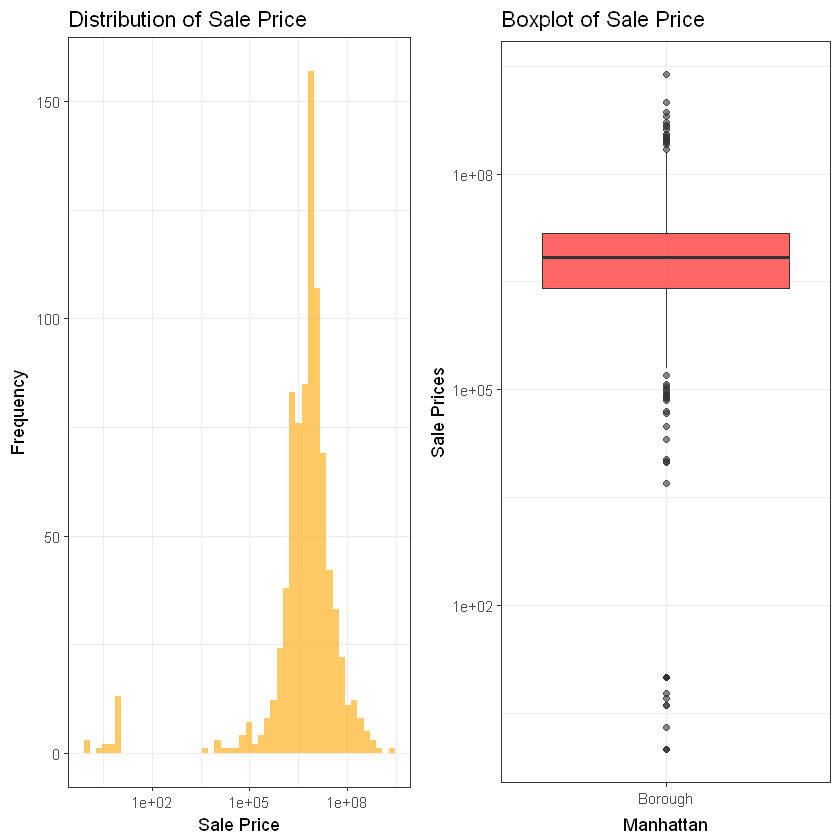

In [210]:
#SalePrice Distribution
his_price <- ggplot(clean_sales, aes(clean_sales$SalePrice)) + 
    geom_histogram(fill="orange", alpha = 0.6, bins = 50) + 
    scale_x_log10() + ggtitle('Distribution of Sale Price') + 
    xlab('Sale Price') + ylab('Frequency') + theme_bw()

bpl_price <- ggplot(clean_sales, aes(y=clean_sales$SalePrice, x='Borough')) +
    geom_boxplot(fill = 'red', alpha = 0.6) + scale_y_log10() + 
    ggtitle('Boxplot of Sale Price') +
    xlab('Manhattan') + ylab('Sale Prices') + theme_bw()

plot_grid(his_price, bpl_price, ncol = 2)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 2600000  5399367  8250000 10446307 13500000 33476600 

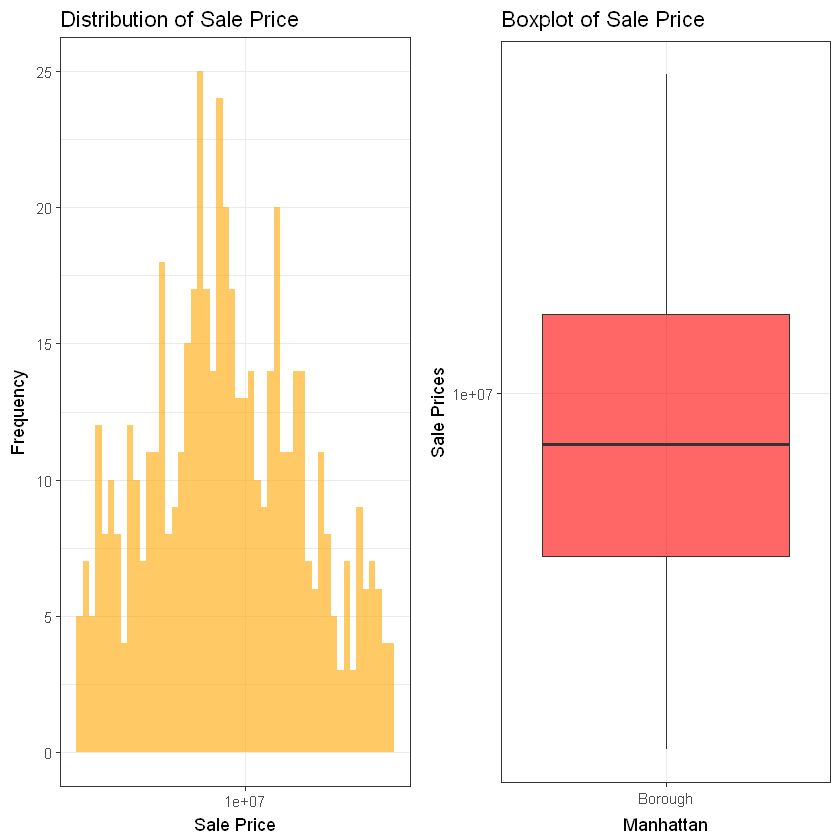

In [211]:
#Remove outliers
x <- clean_sales$SalePrice
qnt <- quantile(x, probs=c(.25,.75),na.rm = TRUE)
H <- 1.5 * IQR(x, na.rm = TRUE)
low <- which(x < (qnt[1])) 
up <- which(x > (qnt[2] + H))

no_outlier_sales <- clean_sales
no_outlier_sales <- no_outlier_sales[-c(low,up),]

no_his_price <- no_outlier_sales %>%
    ggplot(aes(no_outlier_sales$SalePrice)) + 
    geom_histogram(fill="orange", alpha = 0.6, bins = 50) + scale_x_log10() + 
    ggtitle('Distribution of Sale Price') + 
    xlab('Sale Price') + ylab('Frequency') + theme_bw()

no_bpl_price <- no_outlier_sales %>% 
    ggplot(aes(y=no_outlier_sales$SalePrice, x='Borough')) +
    geom_boxplot(fill = 'red', alpha = 0.6) + scale_y_log10() + 
    ggtitle('Boxplot of Sale Price') +
    xlab('Manhattan') + ylab('Sale Prices') + theme_bw()

plot_grid(no_his_price, no_bpl_price)
summary(no_outlier_sales$SalePrice)

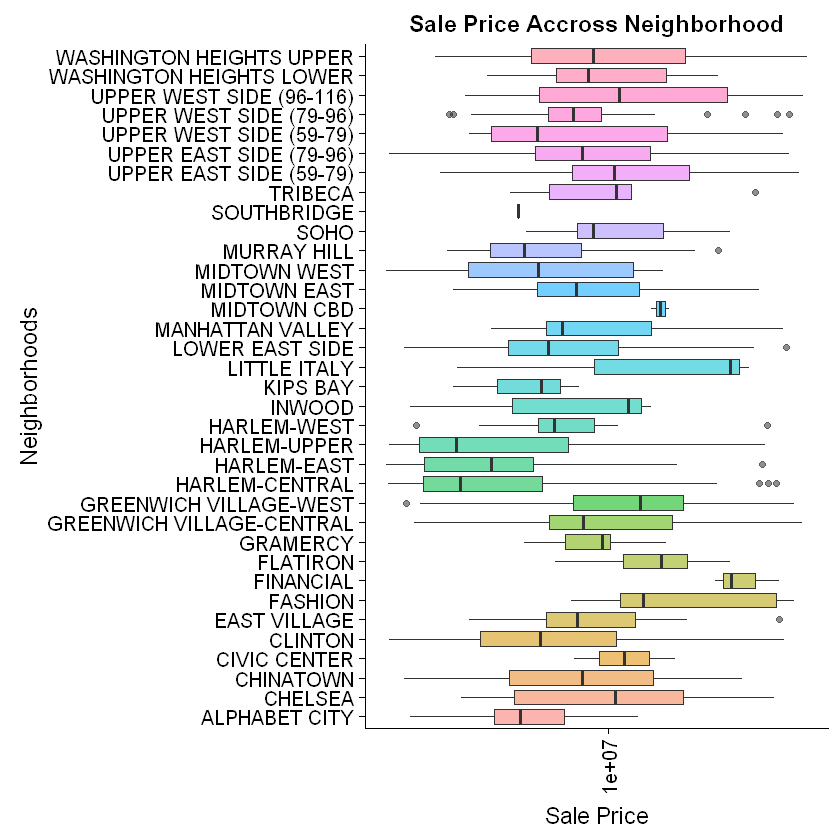

In [195]:
#Sale Price by Neighborhood
ggplot(no_outlier_sales, aes(x = Neighborhood, y = SalePrice, 
                        fill = Neighborhood, alpha = 60)) +
       geom_boxplot() + ggtitle('Sale Price Accross Neighborhood') +
       xlab('Neighborhoods') + ylab('Sale Price') +  
       theme(axis.text.x = element_text(angle=90, vjust=0.5, hjust=1),
             legend.position = 'none') + scale_y_log10() + coord_flip() 

### Quantitative Variables

In [283]:
#Extract quantitative variables
num_var <- data.frame(no_outlier_sales[,numerics[-1]])
head(num_var)

ResidentialUnits,CommercialUnits,YearBuilt,TotalUnits,LandSquareFeet,GrossSquareFeet,SalePrice
1,0,1860,1,987,2183,4844809
12,4,1900,16,4186,10588,10350000
18,0,1910,18,2271,10650,5000000
4,0,2001,4,1950,5446,6250000
16,1,1900,17,1933,8699,5000000
28,2,1900,30,4616,18690,7906412


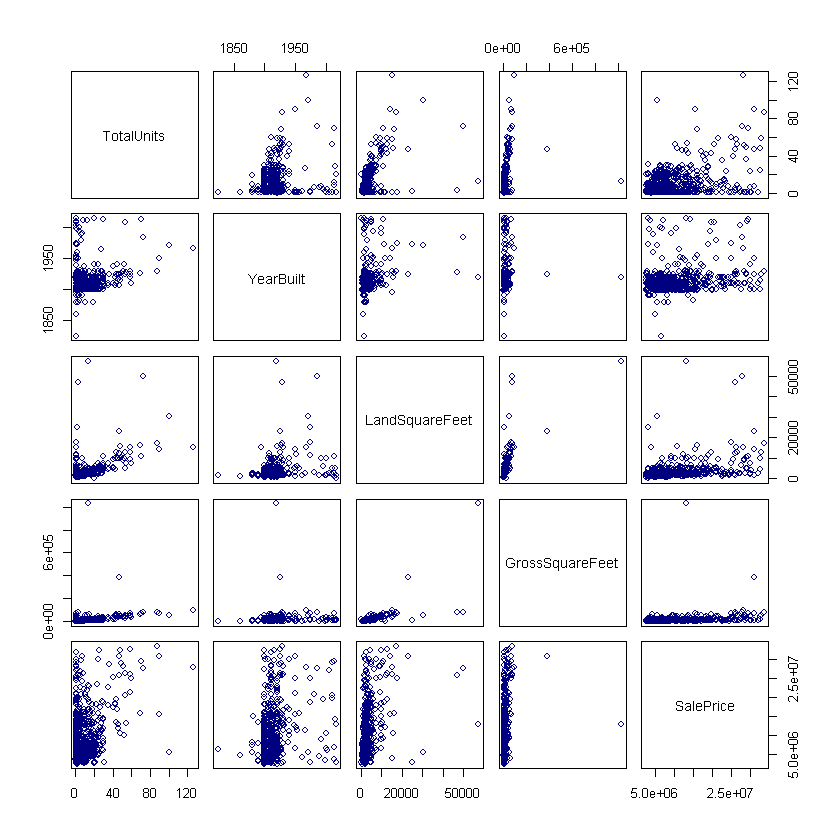

In [284]:
#Overview quantitative variables
num_var %>%
    select(TotalUnits, YearBuilt, LandSquareFeet, 
           GrossSquareFeet, SalePrice) %>%
    pairs(col='navy')

In [285]:
#Create function to remove outliers 
outliers <- function(x,low=TRUE,up=TRUE) {
    qnt <- quantile(x, probs=c(.25,.75),na.rm = TRUE)
    H <- 1.5 * IQR(x, na.rm = TRUE)
    if (low == TRUE) {
        low <- which(x < (qnt[1] - H))
        } else {
        low <- which(x < (qnt[1]))
    }
    if (up == TRUE) {
        up <- which(x > (qnt[2] + H))
        } else {
        up <- which(x > (qnt[2]))
    }
    c(low,up)
}

In [286]:
#Remove outliers
num_var <- num_var[-outliers(num_var$GrossSquareFeet),]
num_var <- num_var[-outliers(num_var$LandSquareFeet),]
num_var <- num_var[-outliers(num_var$YearBuilt),]
num_var <- num_var[-outliers(num_var$TotalUnits),]

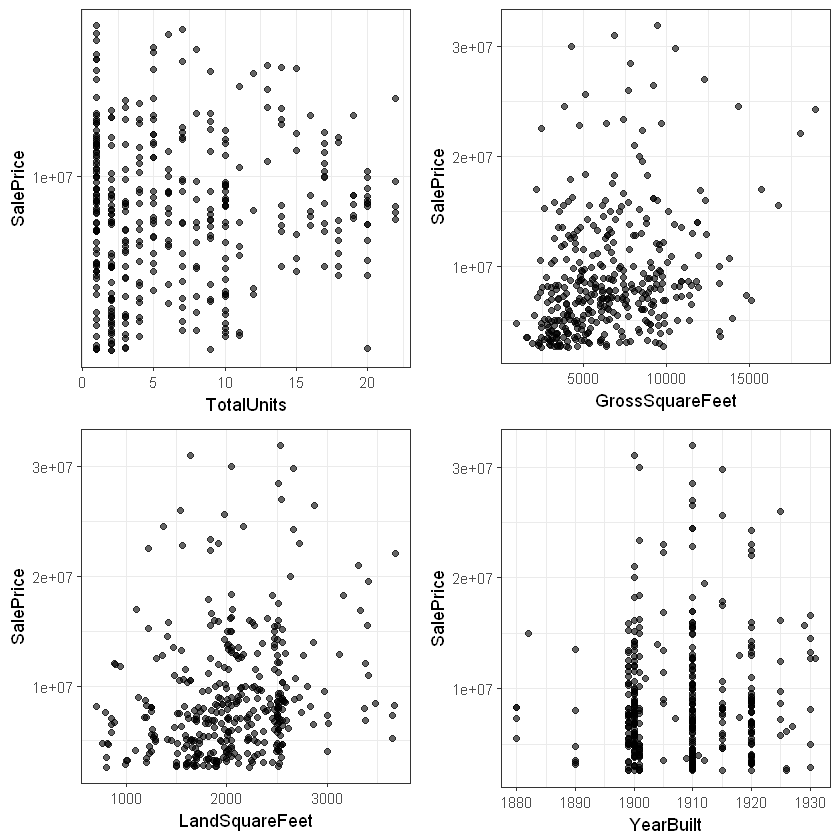

In [311]:
#Total Units and Empty Land
filled_land <- num_var %>% 
    filter(TotalUnits != 0, GrossSquareFeet != 0, SalePrice != 0)

units <- filled_land %>% 
    ggplot(aes(x = TotalUnits, y = SalePrice)) + 
    geom_point(alpha=0.6) + theme_bw() + scale_y_log10()

sqft <- filled_land %>% 
    ggplot(aes(x = GrossSquareFeet, y = SalePrice)) + 
    geom_point(alpha=0.6) + theme_bw() 

land <- filled_land %>% 
    ggplot(aes(x = LandSquareFeet, y = SalePrice)) + 
    geom_point(alpha=0.6) + theme_bw() 

year <- filled_land %>% 
    ggplot(aes(x = YearBuilt, y = SalePrice)) + 
    geom_point(alpha=0.6) + theme_bw() 

plot_grid(units,sqft,land,year, nrow=2, ncol=2)

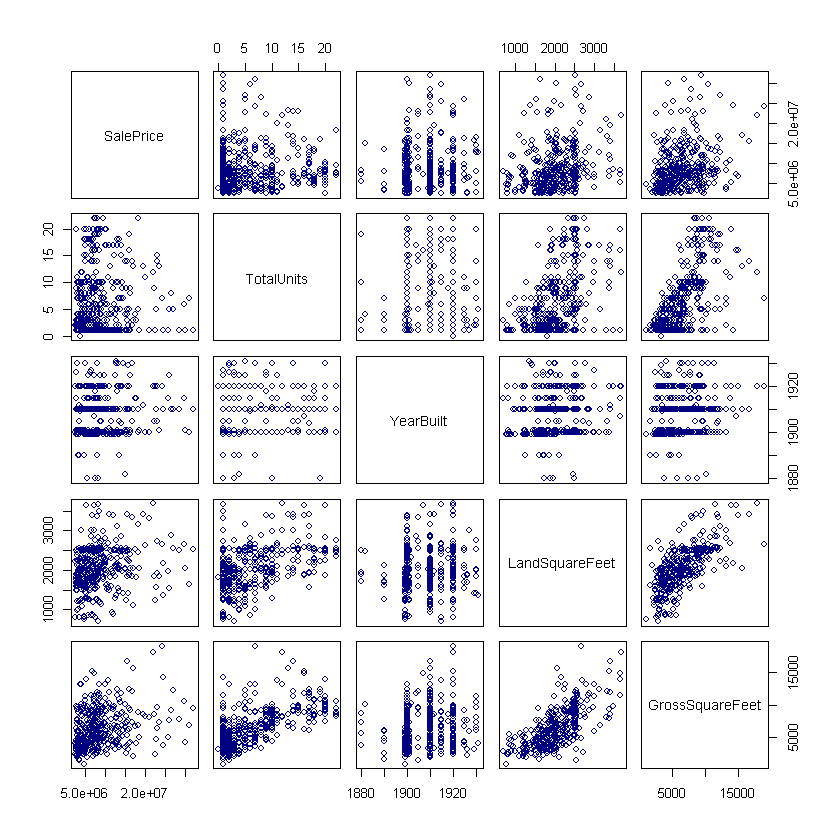

In [304]:
num_var %>%
    select(SalePrice, TotalUnits, YearBuilt, LandSquareFeet, 
           GrossSquareFeet) %>%
    pairs(col='navy')

In [320]:
#Gross Square Feet versus Sale Price
fit_sqft <- lm(filled_land$SalePrice ~ filled_land$GrossSquareFeet,
               data = filled_land)
summary(fit_sqft)


Call:
lm(formula = filled_land$SalePrice ~ filled_land$GrossSquareFeet, 
    data = filled_land)

Residuals:
     Min       1Q   Median       3Q      Max 
-8840590 -3525211 -1528434  2044723 22308021 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 5433245.5   648508.8   8.378 1.08e-15 ***
filled_land$GrossSquareFeet     531.1       90.3   5.881 8.99e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5327000 on 377 degrees of freedom
Multiple R-squared:  0.08404,	Adjusted R-squared:  0.08161 
F-statistic: 34.59 on 1 and 377 DF,  p-value: 8.988e-09


In [323]:
fit_sqft_land <- lm(lm(filled_land$SalePrice ~ 
                       filled_land$GrossSquareFeet + 
                       filled_land$LandSquareFeet, 
                       data = filled_land))
summary(fit_sqft_land)


Call:
lm(formula = lm(filled_land$SalePrice ~ filled_land$GrossSquareFeet + 
    filled_land$LandSquareFeet, data = filled_land))

Residuals:
     Min       1Q   Median       3Q      Max 
-8709152 -3578297 -1552233  1938229 22249895 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 5182802.6  1065021.1   4.866 1.68e-06 ***
filled_land$GrossSquareFeet     504.8      126.7   3.985 8.11e-05 ***
filled_land$LandSquareFeet      205.8      693.8   0.297    0.767    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5334000 on 376 degrees of freedom
Multiple R-squared:  0.08425,	Adjusted R-squared:  0.07938 
F-statistic:  17.3 on 2 and 376 DF,  p-value: 6.517e-08
